# Data Preparation Before Forecasting

- Merge consumption data with weather data
- Clean merged data
- Create the features, at least the ones that are relevant to feed the model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import holidays

d1 = pd.read_csv('testData_2019_SouthTower.csv')
# meteo_raw = pd.read_csv('IST_meteo_data_2017_2018_2019.csv') testData_2019_SouthTower apparently already has meteo data. Thanks Professor!

In [2]:
d1 = d1.rename(columns={'Date': 'date', 'South Tower (kWh)': 'Power_kW'})
d1['date'] = pd.to_datetime(d1['date'], format='%Y-%m-%d %H:%M:%S')
d1 = d1.set_index('date', drop = True)
d1

,Power_kW,temp_C,HR,windSpeed_m/s,windGust_m/s,pres_mbar,solarRad_W/m2,rain_mm/h,rain_day
date,,,,,,,,,
2019-01-01 00:00:00,88.677,10.635833,62.684167,0.0,0.0,1031.000000,2.543250,0.0,0.0
2019-01-01 01:00:00,87.990,10.377500,62.836667,0.0,0.0,1031.000000,1.728667,0.0,0.0
2019-01-01 02:00:00,94.752,10.260833,61.720000,0.0,0.0,1031.083333,2.674750,0.0,0.0
2019-01-01 03:00:00,88.709,9.666667,63.893333,0.0,0.0,1031.083333,2.444250,0.0,0.0
2019-01-01 04:00:00,88.926,8.640833,68.034167,0.0,0.0,1031.000000,3.056333,0.0,0.0
...,...,...,...,...,...,...,...,...,...
2019-04-11 11:00:00,369.718,15.615000,47.215000,0.0,0.0,1022.083333,869.200000,0.0,0.0
2019-04-11 12:00:00,384.712,15.872500,46.630000,0.0,0.0,1022.000000,640.591667,0.0,0.0
2019-04-11 13:00:00,365.119,16.315833,45.955833,0.0,0.0,1021.416667,855.808333,0.0,0.0


In [3]:
# Calculate quartiles and IQR
#q1_kw = d1['Power_kW'].quantile(0.25)
#q3_kw = d1['Power_kW'].quantile(0.75)
#iqr_kw = q3_kw - q1_kw

# Calculate upper and lower bounds for outliers
#lower_bound_kw = q1_kw - 1.5 * iqr_kw
#upper_bound_kw = (q3_kw + 1.5 * iqr_kw) * 1.1

# Clean outliers above the upper bound and below 80 kW
#d1 = d1[(d1['Power_kW'] >= 80) & (d1['Power_kW'] <= upper_bound_kw)]
#d1

### Creating the model's feading features that are missing.
> temp_C is already here but features of time_of_day, hour, week_day and power_m1 are still missing.

Let's do it.

In [4]:
d1[d1.isna().any(axis=1)].index

DatetimeIndex([], dtype='datetime64[ns]', name='date', freq=None)

In [5]:
import holidays

d1['hour'] = d1.index.hour
d1['week_day'] = d1.index.dayofweek

# Create a holiday object for Portugal
#pt_holidays = holidays.Portugal()
# Create a new column to store whether each date is a holiday
#data1['holiday'] = data1.index.map(lambda x: x in pt_holidays)
#data3['holiday'] = data3['holiday'].astype(int)

d1['power_m1'] = d1['Power_kW'].shift(1)
d1 = d1.dropna()
d1

,Power_kW,temp_C,HR,windSpeed_m/s,windGust_m/s,pres_mbar,solarRad_W/m2,rain_mm/h,rain_day,hour,week_day,power_m1
date,,,,,,,,,,,,
2019-01-01 01:00:00,87.990,10.377500,62.836667,0.0,0.0,1031.000000,1.728667,0.0,0.0,1,1,88.677
2019-01-01 02:00:00,94.752,10.260833,61.720000,0.0,0.0,1031.083333,2.674750,0.0,0.0,2,1,87.990
2019-01-01 03:00:00,88.709,9.666667,63.893333,0.0,0.0,1031.083333,2.444250,0.0,0.0,3,1,94.752
2019-01-01 04:00:00,88.926,8.640833,68.034167,0.0,0.0,1031.000000,3.056333,0.0,0.0,4,1,88.709
2019-01-01 05:00:00,89.539,9.093333,63.193333,0.0,0.0,1031.000000,2.426417,0.0,0.0,5,1,88.926
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-04-11 11:00:00,369.718,15.615000,47.215000,0.0,0.0,1022.083333,869.200000,0.0,0.0,11,3,340.736
2019-04-11 12:00:00,384.712,15.872500,46.630000,0.0,0.0,1022.000000,640.591667,0.0,0.0,12,3,369.718
2019-04-11 13:00:00,365.119,16.315833,45.955833,0.0,0.0,1021.416667,855.808333,0.0,0.0,13,3,384.712


In [6]:
# Create the new 'time_of_day' column
d1.loc[:, 'time_of_day'] = 0  # Initialize all values as night (0)
d1.loc[(d1['hour'] >= 7) & (d1['hour'] <= 14), 'time_of_day'] = 1
d1.loc[(d1['hour'] > 14) & (d1['hour'] <= 19), 'time_of_day'] = 0.5
d1

C:\Users\vamor\AppData\Local\Temp\ipykernel_20224\3889117783.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d1.loc[:, 'time_of_day'] = 0  # Initialize all values as night (0)
C:\Users\vamor\AppData\Local\Temp\ipykernel_20224\3889117783.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  d1.loc[(d1['hour'] > 14) & (d1['hour'] <= 19), 'time_of_day'] = 0.5


,Power_kW,temp_C,HR,windSpeed_m/s,windGust_m/s,pres_mbar,solarRad_W/m2,rain_mm/h,rain_day,hour,week_day,power_m1,time_of_day
date,,,,,,,,,,,,,
2019-01-01 01:00:00,87.990,10.377500,62.836667,0.0,0.0,1031.000000,1.728667,0.0,0.0,1,1,88.677,0.0
2019-01-01 02:00:00,94.752,10.260833,61.720000,0.0,0.0,1031.083333,2.674750,0.0,0.0,2,1,87.990,0.0
2019-01-01 03:00:00,88.709,9.666667,63.893333,0.0,0.0,1031.083333,2.444250,0.0,0.0,3,1,94.752,0.0
2019-01-01 04:00:00,88.926,8.640833,68.034167,0.0,0.0,1031.000000,3.056333,0.0,0.0,4,1,88.709,0.0
2019-01-01 05:00:00,89.539,9.093333,63.193333,0.0,0.0,1031.000000,2.426417,0.0,0.0,5,1,88.926,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-04-11 11:00:00,369.718,15.615000,47.215000,0.0,0.0,1022.083333,869.200000,0.0,0.0,11,3,340.736,1.0
2019-04-11 12:00:00,384.712,15.872500,46.630000,0.0,0.0,1022.000000,640.591667,0.0,0.0,12,3,369.718,1.0
2019-04-11 13:00:00,365.119,16.315833,45.955833,0.0,0.0,1021.416667,855.808333,0.0,0.0,13,3,384.712,1.0


In [7]:
d1.loc[:, 'hdh'] = np.maximum(0, 16 - d1['temp_C'])
d1

C:\Users\vamor\AppData\Local\Temp\ipykernel_20224\2409401280.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d1.loc[:, 'hdh'] = np.maximum(0, 16 - d1['temp_C'])


,Power_kW,temp_C,HR,windSpeed_m/s,windGust_m/s,pres_mbar,solarRad_W/m2,rain_mm/h,rain_day,hour,week_day,power_m1,time_of_day,hdh
date,,,,,,,,,,,,,,
2019-01-01 01:00:00,87.990,10.377500,62.836667,0.0,0.0,1031.000000,1.728667,0.0,0.0,1,1,88.677,0.0,5.622500
2019-01-01 02:00:00,94.752,10.260833,61.720000,0.0,0.0,1031.083333,2.674750,0.0,0.0,2,1,87.990,0.0,5.739167
2019-01-01 03:00:00,88.709,9.666667,63.893333,0.0,0.0,1031.083333,2.444250,0.0,0.0,3,1,94.752,0.0,6.333333
2019-01-01 04:00:00,88.926,8.640833,68.034167,0.0,0.0,1031.000000,3.056333,0.0,0.0,4,1,88.709,0.0,7.359167
2019-01-01 05:00:00,89.539,9.093333,63.193333,0.0,0.0,1031.000000,2.426417,0.0,0.0,5,1,88.926,0.0,6.906667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-04-11 11:00:00,369.718,15.615000,47.215000,0.0,0.0,1022.083333,869.200000,0.0,0.0,11,3,340.736,1.0,0.385000
2019-04-11 12:00:00,384.712,15.872500,46.630000,0.0,0.0,1022.000000,640.591667,0.0,0.0,12,3,369.718,1.0,0.127500
2019-04-11 13:00:00,365.119,16.315833,45.955833,0.0,0.0,1021.416667,855.808333,0.0,0.0,13,3,384.712,1.0,0.000000


### Saving the data with the features to then test the model.

In [41]:
d1.to_csv('IST_South_Tower2019_with_features_test.csv', encoding='utf-8', index=True)

# Testing the Models

Here I'll test the developed model with this new 2019 data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

In [2]:
df_t = pd.read_csv('IST_South_Tower2019_with_features_test.csv')
df_t['date'] = pd.to_datetime(df_t['date'])
df_t = df_t.set_index('date', drop = True)
df_t

,Power_kW,temp_C,HR,windSpeed_m/s,windGust_m/s,pres_mbar,solarRad_W/m2,rain_mm/h,rain_day,hour,week_day,power_m1,time_of_day,hdh
date,,,,,,,,,,,,,,
2019-01-01 01:00:00,87.990,10.377500,62.836667,0.0,0.0,1031.000000,1.728667,0.0,0.0,1,1,88.677,0.0,5.622500
2019-01-01 02:00:00,94.752,10.260833,61.720000,0.0,0.0,1031.083333,2.674750,0.0,0.0,2,1,87.990,0.0,5.739167
2019-01-01 03:00:00,88.709,9.666667,63.893333,0.0,0.0,1031.083333,2.444250,0.0,0.0,3,1,94.752,0.0,6.333333
2019-01-01 04:00:00,88.926,8.640833,68.034167,0.0,0.0,1031.000000,3.056333,0.0,0.0,4,1,88.709,0.0,7.359167
2019-01-01 05:00:00,89.539,9.093333,63.193333,0.0,0.0,1031.000000,2.426417,0.0,0.0,5,1,88.926,0.0,6.906667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-04-11 11:00:00,369.718,15.615000,47.215000,0.0,0.0,1022.083333,869.200000,0.0,0.0,11,3,340.736,1.0,0.385000
2019-04-11 12:00:00,384.712,15.872500,46.630000,0.0,0.0,1022.000000,640.591667,0.0,0.0,12,3,369.718,1.0,0.127500
2019-04-11 13:00:00,365.119,16.315833,45.955833,0.0,0.0,1021.416667,855.808333,0.0,0.0,13,3,384.712,1.0,0.000000


In [3]:
#Load ML model
with open('NN_100278.pkl','rb') as file:
    model=pickle.load(file)

model

MLPRegressor(alpha=0.1, hidden_layer_sizes=(35, 15, 5, 3),
             learning_rate='adaptive', max_iter=25000, random_state=21)

In [4]:
Z = df_t.values
Y = Z[:,0]
X = Z[:,[1,9,10,11,12,13]]

print(Y)
print(X)

[ 87.99   94.752  88.709 ... 365.119 364.071 387.756]
[[1.03775000e+01 1.00000000e+00 1.00000000e+00 8.86770000e+01
  0.00000000e+00 5.62250000e+00]
 [1.02608333e+01 2.00000000e+00 1.00000000e+00 8.79900000e+01
  0.00000000e+00 5.73916667e+00]
 [9.66666667e+00 3.00000000e+00 1.00000000e+00 9.47520000e+01
  0.00000000e+00 6.33333333e+00]
 ...
 [1.63158333e+01 1.30000000e+01 3.00000000e+00 3.84712000e+02
  1.00000000e+00 0.00000000e+00]
 [1.57554545e+01 1.40000000e+01 3.00000000e+00 3.65119000e+02
  1.00000000e+00 2.44545455e-01]
 [1.52900000e+01 1.50000000e+01 3.00000000e+00 3.64071000e+02
  5.00000000e-01 7.10000000e-01]]


In [5]:
y_pred_ = model.predict(X)

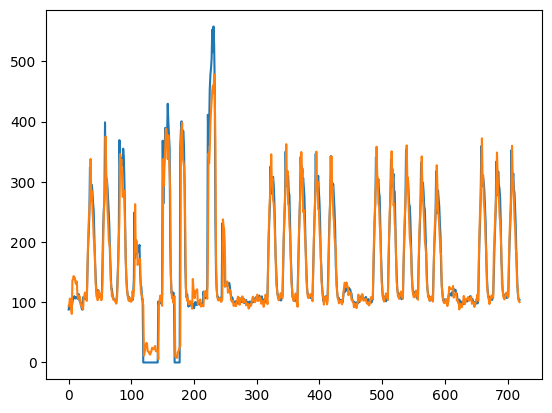

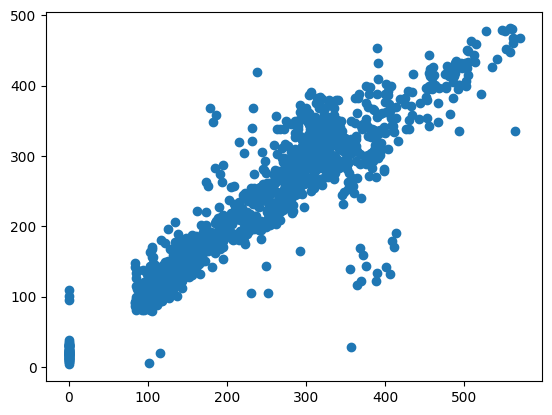

In [13]:
plt.plot(Y[0:720])
plt.plot(y_pred_[0:720])
plt.show()
plt.scatter(Y,y_pred_)

In [12]:
from sklearn import  metrics
MAE=metrics.mean_absolute_error(Y,y_pred_)
MBE=np.mean(Y-y_pred_)
MSE=metrics.mean_squared_error(Y,y_pred_)
RMSE= np.sqrt(metrics.mean_squared_error(Y,y_pred_))
cvRMSE=RMSE/np.mean(Y)
NMBE=MBE/np.mean(Y)
print(MAE,MBE,MSE,RMSE,cvRMSE,NMBE)

19.151997854137807 6.5190236159939445 1237.0529362980549 35.17176333791149 0.19646876037131702 0.036415134389498144


### Model Evalutation

For the AHSRAE norm the cvRMSE should be below 30% and NMBE below 10%
For the IPMVP norm the cvRMSE should be below 20% and the NMBE below 5%
> Both Linear Regression Model, Random Forest and NN check this requisites.
>
Still NN has a slight lower error so that was the model submited.

### Use the model

In [8]:
import numpy as np

# Define the input variables
temp_C = 19.0
hour = 13.0
week_day = 7
power_m1 = 100 # get the power at the last hour somewhere? that API is for the entire campus...
time_of_day = 1
hdh = 3

# Create the input array
X_now = np.array([temp_C, hour, week_day, power_m1, time_of_day, hdh])

# Reshape the input array for prediction
X_now_reshaped = X_now.reshape(1, -1)

# Perform the prediction
y2_next_hour = model.predict(X_now_reshaped)

# Print the result
print(f"The Energy Consumption of IST's South Tower for the hour {hour}h is: {y2_next_hour} kW.")

The Energy Consumption of IST's South Tower for the hour 13.0h is: [93.33757052] kW.
